## Introduction

To know which factor may affect the student's performance, we classify the score into couple of ranks, and figure out which feature affects the score more significant. The independent variables are follow:

1. gender : sex of students
2. race/ethnicity : ethnicity of students
3. parental level of education : parents' final education
4. lunch : having lunch before test (normal or abnormal)
5. test preparation course : complete or not complete before test

In [1]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'sklearn'

Let's see how many datasets in this topic.

In [2]:
os.listdir(".")

['.bashrc',
 '.bash_logout',
 '.profile',
 '.jupyter-server-log.txt',
 '.ipython',
 '.cache',
 '.config',
 '.jupyter',
 '.ipynb_checkpoints',
 '.local',
 'README.md',
 'matplotlib_examples.ipynb',
 'reactors.ipynb',
 'exam_results.csv',
 'student_exams_assignment.ipynb',
 'reactors.csv',
 '.git']

Only one! Take a look at the dataset.


In [3]:
filename = "exam_results.csv"
score_df = pd.read_csv(filename)
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Some column names are too long, rename the column names to be simpler. 

In [4]:
score_df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
score_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Seems clearly. Check the data type.

In [5]:
score_df.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
pre                 object
math                 int64
reading              int64
writing              int64
dtype: object

Plotting the average scores per gender. Use a Matplotlib Barplot

<AxesSubplot:xlabel='gender', ylabel='math score'>

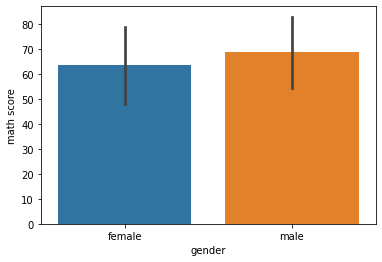

In [6]:
exam_results = pd.read_csv('exam_results.csv')
sns.barplot(x = 'gender', y = 'math score',data = exam_results, ci = 'sd' )

<AxesSubplot:xlabel='gender', ylabel='reading score'>

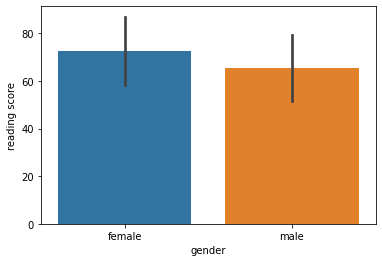

In [7]:
sns.barplot(x = 'gender', y = 'reading score',data = exam_results, ci = 'sd' )

<AxesSubplot:xlabel='gender', ylabel='writing score'>

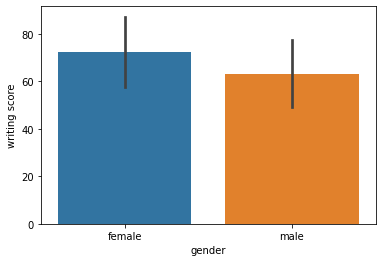

In [8]:
sns.barplot(x = 'gender', y = 'writing score',data = exam_results, ci = 'sd' )

Plot the average scores per category of "lunch" and "pre". Use a seaborn boxplot chart.

<AxesSubplot:xlabel='lunch', ylabel='math score'>

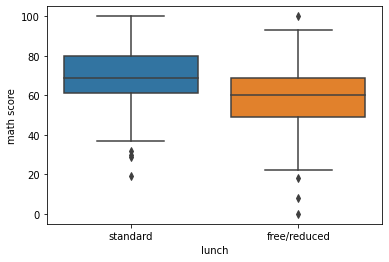

In [10]:
sns.boxplot(x="lunch", y="math score", data=exam_results)

<AxesSubplot:xlabel='lunch', ylabel='reading score'>

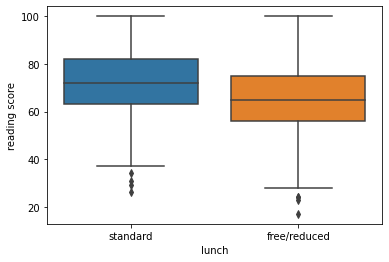

In [11]:
sns.boxplot(x="lunch", y="reading score", data=exam_results)

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

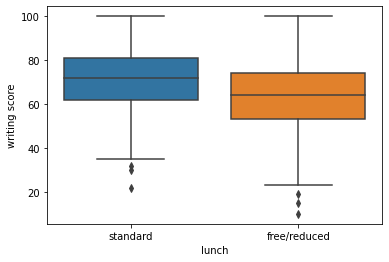

In [12]:
sns.boxplot(x="lunch", y="writing score", data=exam_results)

<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

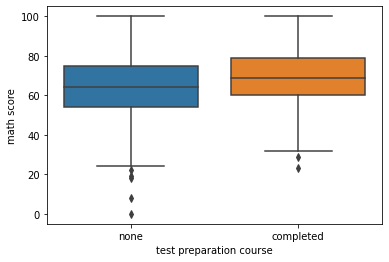

In [14]:
sns.boxplot(x="test preparation course", y="math score", data=exam_results)

<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>

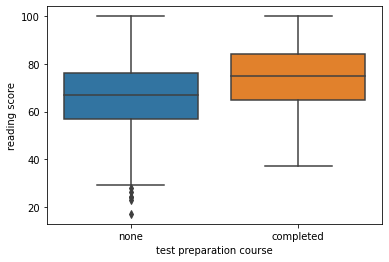

In [15]:
sns.boxplot(x="test preparation course", y="reading score", data=exam_results)

<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

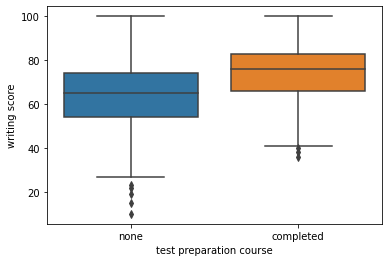

In [16]:
sns.boxplot(x="test preparation course", y="writing score", data=exam_results)